# Dataset Maker - Six Shapes
More info: https://github.com/reevald/MathEdu
## Dataset Information

- The data set consists of 6 classes, namely circle, kite, parallelogram, square, trapezoid, triangle.
- Each class consists of 4000 images with 224x224x3 pixels
- Train:Validation:Test ~ 6:1:1 ~ 3000:500:500

## Import Libraries

In [ ]:
import os
import zipfile
import random
import math
from google.colab import files
from PIL import Image, ImageDraw

## Folder preparation

In [ ]:
label = ['circle','kite','parallelogram','square','trapezoid','triangle']
base_dir = '/tmp/six-shapes'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
# Create directory
try:
  os.mkdir(base_dir)
  for par_dir in [train_dir, val_dir, test_dir]:
    os.mkdir(par_dir)
    for ch_dir in [os.path.join(par_dir, lb) for lb in label]:
      os.mkdir(ch_dir)
  print('\nCreate directory successfully!')
except OSError as err:
  print('\nUnable create directory, {}'.format(err))


Create directory successfully!


## Shape Handler
Reference:  
- https://pillow.readthedocs.io/en/stable/handbook/concepts.html#coordinate-system
- https://pillow.readthedocs.io/en/stable/reference/ImageDraw.html
- https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes
- https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.new

In [ ]:
# global parameter
size_img = (224, 224)
list_color_rgb = [
    (0, 0, 0), #black
    (255, 0, 0), #red
    (160, 32, 255), #purple
    (0, 32, 255), #blue
    (0, 192, 0), #green
    (255, 160, 16) #orange
]
weights_color = [0.167, 0.167, 0.167, 0.167, 0.167, 0.167]

### Circle

In [ ]:
def createCircle(width_box, height_box, color, size_img, width_line, rotate, path_file, show):

  # center box position
  # (x0, y0) = coordinate upper left of box
  # (x1, y1) = coordinate bottom right of box
  # size_img = (width_canvas, height_canvas)

  x0 = math.floor((size_img[0] - width_box) / 2)
  y0 = math.floor((size_img[1] - height_box) / 2)

  x1 = x0 + width_box
  y1 = y0 + height_box

  im = Image.new(
      mode='RGB', # 3 channel (0-255)
      size=size_img,
      color=(255,255,255) # white background
  )

  draw = ImageDraw.Draw(im)

  draw.ellipse(
      xy=[(x0, y0), (x1, y1)],
      fill=None,
      outline=color,
      width=width_line
  )

  im = im.rotate(rotate, fillcolor=(255,255,255))
  im.save(path_file)

  if show is True:
    return im


Test random circle

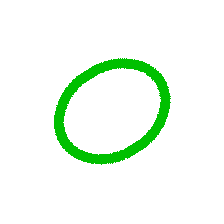

In [ ]:
width_box = random.randrange(70, 200)
height_box = random.randrange(70, 200)
rotate = random.randrange(-40, 40)

# Test random circle size
createCircle(
    width_box=width_box,
    height_box=height_box,
    color=list_color_rgb[4],
    size_img=size_img,
    width_line=10,
    rotate=rotate,
    path_file='/tmp/sample-circle.png',
    show=True
)

### Kite

In [ ]:
def createKite(diag_horz, diag_vert, list_4_color, size_img, width_line, rotate, path_file, show):

  im = Image.new(
      mode='RGB',
      size=size_img,
      color=(255,255,255)
  )

  # coord y point on diagonal vertical
  top_diag_vert = math.floor((size_img[1] - diag_vert) / 2)
  mid_diag_vert = math.floor(size_img[1] / 2)
  bot_diag_vert = size_img[1] - top_diag_vert

  # buff for : top_diag_vert != intercept_diag != mid_diag_vert
  buff = 10
  intercept_diag = random.randrange(top_diag_vert + 2 * buff, mid_diag_vert - buff)

  # coord x point on diagonal horizontal
  left_diag_horz = math.floor((size_img[0] - diag_horz) / 2)
  mid_diag_horz = math.floor(size_img[0] / 2)
  right_diag_horz = size_img[0] - left_diag_horz

  draw = ImageDraw.Draw(im)

  point = [
      (left_diag_horz, intercept_diag),
      (mid_diag_horz, top_diag_vert),
      (right_diag_horz, intercept_diag),
      (mid_diag_horz, bot_diag_vert)
  ]

  for i,p in enumerate(point):
    j = 0 if (i == 3) else i + 1
    draw.line(
        xy=[point[i], point[j]],
        fill=list_4_color[i],
        width=width_line
    )
    draw.ellipse(
        xy=(p[0] - 4, p[1] - 4, p[0]  + 4, p[1] + 4),
        fill=list_4_color[i]
    )
    
  im = im.rotate(rotate, fillcolor=(255,255,255))
  im.save(path_file)

  if show is True:
    return im

Test random kite

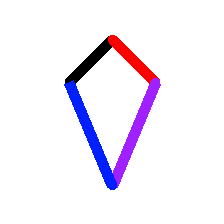

In [ ]:
diag_vert = random.randrange(130, 200)
diag_horz = random.randrange(70, 130)
rotate = random.randrange(-20, 20)

createKite(
    diag_horz=diag_horz,
    diag_vert=diag_vert,
    list_4_color=[color for color in list_color_rgb[0:4]],
    size_img=size_img,
    width_line=10,
    rotate=rotate,
    path_file='/tmp/sample-kite.png',
    show=True
)

### Parallelogram

In [ ]:
def createParallelogram(top_horz, left_slope, angle_deg, flip, list_4_color, size_img, width_line, rotate, path_file, show):

  im = Image.new(
      mode='RGB',
      size=size_img,
      color=(255,255,255)
  )

  angle_top_left = math.radians(angle_deg) # interval deg (0, 90) or rad (0, pi/2)

  # search height and width parallelogram to determine size box frame shape
  proj_slope_on_top = left_slope * math.cos(angle_top_left)
  height_shape = left_slope * math.sin(angle_top_left)
  width_shape = proj_slope_on_top + top_horz

  # determine xy coordinate box frame shape
  x_left_shape = math.floor((size_img[0] - width_shape) / 2)
  y_top_shape = math.floor((size_img[1] - height_shape) / 2)
  x_right_shape = size_img[0] - x_left_shape
  y_bot_shape = size_img[1] - y_top_shape

  point = [
      (x_left_shape, y_top_shape),
      (x_left_shape + top_horz, y_top_shape),
      (x_right_shape, y_bot_shape),
      (x_right_shape - top_horz, y_bot_shape)
  ]

  draw = ImageDraw.Draw(im)

  for i,p in enumerate(point):
      j = 0 if (i == 3) else i + 1
      draw.line(
          xy=[point[i], point[j]],
          fill=list_4_color[i],
          width=width_line
      )
      draw.ellipse(
          xy=(p[0] - 4, p[1] - 4, p[0]  + 4, p[1] + 4),
          fill=list_4_color[i]
      )

  im = im.rotate(rotate, fillcolor=(255,255,255))
  if flip is True:
    im = im.transpose(method=Image.FLIP_LEFT_RIGHT)

  im.save(path_file)
  
  if show is True:
    return im

Test random parallelogram

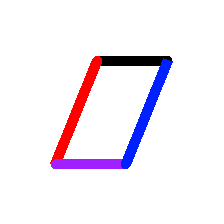

In [ ]:
left_slope = random.randrange(70, 120)
top_horz = random.randrange(70, 120)
angle_deg = random.randrange(30, 80)
rotate = random.randrange(-5, 5)

createParallelogram(
    top_horz=top_horz,
    left_slope=left_slope,
    size_img=size_img,
    angle_deg=angle_deg,
    flip=True,
    list_4_color=[color for color in list_color_rgb[0:4]],
    width_line=10,
    rotate=rotate,
    path_file='/tmp/sample-parallelogram.png',
    show=True
)

### Square

In [ ]:
def createSquare(length_shape, size_img, list_4_color, width_line, rotate, path_file, show):

  im = Image.new(
      mode='RGB',
      size=size_img,
      color=(255,255,255)
  )

  y_top_shape = math.floor((size_img[1] - length_shape) / 2) 
  y_bot_shape = size_img[1] - y_top_shape

  x_left_shape = math.floor((size_img[0] - length_shape) / 2)
  x_right_shape = size_img[0] - x_left_shape

  point = [
      (x_left_shape, y_top_shape),
      (x_right_shape, y_top_shape),
      (x_right_shape, y_bot_shape),
      (x_left_shape, y_bot_shape)
  ]

  draw = ImageDraw.Draw(im)

  for i,p in enumerate(point):
      j = 0 if (i == 3) else i + 1
      draw.line(
          xy=[point[i], point[j]],
          fill=list_4_color[i],
          width=width_line
      )
      draw.ellipse(
          xy=(p[0] - 4, p[1] - 4, p[0]  + 4, p[1] + 4),
          fill=list_4_color[i]
      )

  im = im.rotate(rotate, fillcolor=(255,255,255))
  im.save(path_file)

  if show is True:
    return im

Test random square

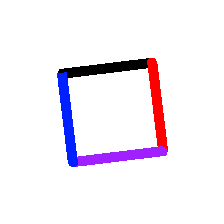

In [ ]:
length_shape = random.randrange(70, 120)
rotate = random.randrange(-10, 10)

createSquare(
    length_shape=length_shape,
    size_img=size_img,
    list_4_color=[color for color in list_color_rgb[0:4]],
    width_line=10,
    rotate=rotate,
    path_file='/tmp/sample-square.png',
    show=True
)

### Trapezoid

In [ ]:
def createTrapezoid(top_horz, bot_horz, list_4_color, height_shape, flip, size_img, width_line, rotate, path_file, show):

  im = Image.new(
      mode='RGB',
      size=size_img,
      color=(255,255,255)
  )

  y_top_shape = math.floor((size_img[1] - height_shape) / 2)
  y_bot_shape = size_img[1] - y_top_shape

  x_left_top_shape = math.floor((size_img[0] - top_horz) / 2)
  x_right_top_shape = size_img[0] - x_left_top_shape

  x_left_bot_shape = math.floor((size_img[0] - bot_horz) / 2)
  x_right_bot_shape = size_img[0] - x_left_bot_shape

  point = [
      (x_left_top_shape, y_top_shape),
      (x_right_top_shape, y_top_shape),
      (x_right_bot_shape, y_bot_shape),
      (x_left_bot_shape, y_bot_shape)
  ]

  draw = ImageDraw.Draw(im)

  for i,p in enumerate(point):
      j = 0 if (i == 3) else i + 1
      draw.line(
          xy=[point[i], point[j]],
          fill=list_4_color[i],
          width=width_line
      )
      draw.ellipse(
          xy=(p[0] - 4, p[1] - 4, p[0]  + 4, p[1] + 4),
          fill=list_4_color[i]
      )

  im = im.rotate(rotate, fillcolor=(255,255,255))
  if flip is True:
    im = im.transpose(method=Image.FLIP_TOP_BOTTOM)

  im.save(path_file)

  if show is True:
    return im

Test random trapezoid

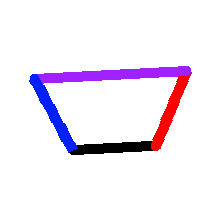

In [ ]:
top_horz = random.randrange(70, 120)
bot_horz = random.randrange(top_horz+50, 200)
height_shape = random.randrange(50, 150)
rotate = random.randrange(-5, 5)

createTrapezoid(
    top_horz=top_horz,
    bot_horz=bot_horz,
    list_4_color=[color for color in list_color_rgb[0:4]],
    height_shape=height_shape,
    size_img=size_img,
    flip=True,
    width_line=10,
    rotate=rotate,
    path_file='/tmp/sample-trapezoid.png',
    show=True
)

### Triangle

In [ ]:
def createTriangle(height_shape, width_shape, list_3_color, size_img, width_line, rotate, path_file, show):

  im = Image.new(
      mode='RGB',
      size=size_img,
      color=(255,255,255)
  )

  y_top_shape = math.floor((size_img[1] - height_shape) / 2)
  y_bot_shape = size_img[1] - y_top_shape

  x_min_top = math.floor((size_img[0] - (width_shape / 2)) / 2)
  x_max_top = size_img[0] - x_min_top
  x_top_shape = random.randrange(x_min_top, x_max_top)

  x_left_bot_shape = math.floor((size_img[0] - width_shape) / 2)
  x_right_bot_shape = size_img[0] - x_left_bot_shape

  point = [
      (x_left_bot_shape, y_bot_shape),
      (x_top_shape, y_top_shape),
      (x_right_bot_shape, y_bot_shape)
  ]

  draw = ImageDraw.Draw(im)

  for i,p in enumerate(point):
      j = 0 if (i == 2) else i + 1
      draw.line(
          xy=[point[i], point[j]],
          fill=list_3_color[i],
          width=width_line
      )
      draw.ellipse(
          xy=(p[0] - 4, p[1] - 4, p[0]  + 4, p[1] + 4),
          fill=list_3_color[i]
      )

  im = im.rotate(rotate, fillcolor=(255,255,255))
  im.save(path_file)

  if show is True:
    return im

Test random triangle

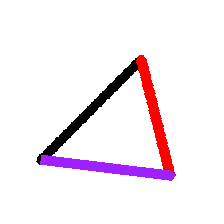

In [ ]:
height_shape = random.randrange(70, 180)
width_shape = random.randrange(70, 180)
rotate = random.randrange(-180, 180)

createTriangle(
    height_shape=height_shape,
    width_shape=width_shape,
    list_3_color=[color for color in list_color_rgb[0:3]],
    size_img=size_img,
    width_line=10,
    rotate=rotate,
    path_file='/tmp/sample-triangle.png',
    show=True
)

## Split Handler

In [ ]:
num_train = 3000
num_val = 500
num_test = 500

In [ ]:
list_color_train = random.choices(list_color_rgb, weights=weights_color, k=num_train)
list_color_val = random.choices(list_color_rgb, weights=weights_color, k=num_val)
list_color_test = random.choices(list_color_rgb, weights=weights_color, k=num_test)

In [ ]:
def split_dataset(name, num, list_color, size_img, base_class_dir):
  for i in range(num):
    # balance flip image (~50%)
    flip = True if i % 2 == 0 else False
    # fix index out of range
    i_start = 0 if (i + 4 >= num - 1) else i

    # circle generator
    width_box = random.randrange(70, 200)
    height_box = random.randrange(70, 200)
    rotate = random.randrange(-40, 40)

    createCircle(
        width_box=width_box,
        height_box=height_box,
        color=list_color[i],
        size_img=size_img,
        width_line=10,
        rotate=rotate,
        path_file=os.path.join(base_class_dir, 'circle', 'circle-{}-{}.png'.format(name,i)),
        show=False
    )

    # kite generator
    diag_vert = random.randrange(130, 200)
    diag_horz = random.randrange(70, 130)
    rotate = random.randrange(-20, 20)

    createKite(
        diag_horz=diag_horz,
        diag_vert=diag_vert,
        list_4_color=[color for color in list_color[i_start:i_start+4]],
        size_img=size_img,
        width_line=10,
        rotate=rotate,
        path_file=os.path.join(base_class_dir, 'kite', 'kite-{}-{}.png'.format(name,i)),
        show=False
    )

    # parallelogram generator
    left_slope = random.randrange(70, 120)
    top_horz = random.randrange(70, 120)
    angle_deg = random.randrange(30, 80)
    rotate = random.randrange(-5, 5)

    createParallelogram(
        top_horz=top_horz,
        left_slope=left_slope,
        list_4_color=[color for color in list_color[i_start:i_start+4]],
        size_img=size_img,
        angle_deg=angle_deg,
        flip=flip,
        width_line=10,
        rotate=rotate,
        path_file=os.path.join(base_class_dir, 'parallelogram', 'parallelogram-{}-{}.png'.format(name,i)),
        show=False
    )

    # square generator
    length_shape = random.randrange(70, 120)
    rotate = random.randrange(-10, 10)

    createSquare(
        length_shape=length_shape,
        list_4_color=[color for color in list_color[i_start:i_start+4]],
        size_img=size_img,
        width_line=10,
        rotate=rotate,
        path_file=os.path.join(base_class_dir, 'square', 'square-{}-{}.png'.format(name,i)),
        show=False
    )

    # trapezoid generator
    top_horz = random.randrange(70, 120)
    bot_horz = random.randrange(top_horz+50, 200)
    height_shape = random.randrange(50, 150)
    rotate = random.randrange(-5, 5)

    createTrapezoid(
        top_horz=top_horz,
        bot_horz=bot_horz,
        height_shape=height_shape,
        list_4_color=[color for color in list_color[i_start:i_start+4]],
        size_img=size_img,
        flip=flip,
        width_line=10,
        rotate=rotate,
        path_file=os.path.join(base_class_dir, 'trapezoid', 'trapezoid-{}-{}.png'.format(name,i)),
        show=False
    )

    # triangle generator
    height_shape = random.randrange(70, 180)
    width_shape = random.randrange(70, 180)
    rotate = random.randrange(-180, 180)

    createTriangle(
        height_shape=height_shape,
        width_shape=width_shape,
        list_3_color=[color for color in list_color[i_start:i_start+3]],
        size_img=size_img,
        width_line=10,
        rotate=rotate,
        path_file=os.path.join(base_class_dir, 'triangle', 'triangle-{}-{}.png'.format(name,i)),
        show=False
    )

In [ ]:
def len_class_dir(base_dir, label):
  for lb in label:
    print('\n{} : train({}), val({}), test({})'.format(
        lb,
        len(os.listdir(os.path.join(base_dir, 'train', lb))),
        len(os.listdir(os.path.join(base_dir, 'val', lb))),
        len(os.listdir(os.path.join(base_dir, 'test', lb)))
    ))

### Generate Dataset

In [ ]:
!rm -R /tmp/six-shapes

In [ ]:
split_dataset(
    name='train',
    num=num_train,
    list_color=list_color_train,
    size_img=size_img,
    base_class_dir=train_dir
)

# show result
len_class_dir(
    base_dir=base_dir,
    label=label
)


circle : train(3000), val(0), test(0)

kite : train(3000), val(0), test(0)

parallelogram : train(3000), val(0), test(0)

square : train(3000), val(0), test(0)

trapezoid : train(3000), val(0), test(0)

triangle : train(3000), val(0), test(0)


### Validation Dataset

In [ ]:
split_dataset(
    name='val',
    num=num_val,
    list_color=list_color_val,
    size_img=size_img,
    base_class_dir=val_dir
)

# show result
len_class_dir(
    base_dir=base_dir,
    label=label
)


circle : train(3000), val(500), test(0)

kite : train(3000), val(500), test(0)

parallelogram : train(3000), val(500), test(0)

square : train(3000), val(500), test(0)

trapezoid : train(3000), val(500), test(0)

triangle : train(3000), val(500), test(0)


### Test Dataset

In [ ]:
split_dataset(
    name='test',
    num=num_test,
    list_color=list_color_test,
    size_img=size_img,
    base_class_dir=test_dir
)

# show result
len_class_dir(
    base_dir=base_dir,
    label=label
)


circle : train(3000), val(500), test(500)

kite : train(3000), val(500), test(500)

parallelogram : train(3000), val(500), test(500)

square : train(3000), val(500), test(500)

trapezoid : train(3000), val(500), test(500)

triangle : train(3000), val(500), test(500)


## Compress Files

In [ ]:
!cd /tmp && zip -r 'six-shapes-dataset-v2.zip' 'six-shapes'

## Download

In [ ]:
files.download('/tmp/six-shapes-dataset-v2.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>